# 模拟结果可视化

In [58]:
import os, sys
import pandas as pd 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

import scienceplots
plt.style.use(['science', 'nature', 'no-latex', 'notebook'])

this_path = os.path.abspath('.')
if this_path not in sys.path:
    sys.path.append(this_path)

result_path = os.path.join(this_path, '../../result')


## 1. p+和pi-

In [59]:
ppi_file = os.path.join(result_path, 'single_ppi.csv')
ppi_data = pd.read_csv(ppi_file, index_col=0)

ppi_data

,particle,material,thickness,p,cos_theta,p_loc,p_loc_err,p_scale,p_scale_err,theta_loc,theta_loc_err,theta_scale,theta_scale_err,efficiency,valid,all,delta_angle_one_sigma
0,single_pi-,ld,0,0.15,0.05,-0.001519,0.000020,0.006703,0.000085,0.002162,0.000375,0.015974,0.000306,0.917215,975.0,1063.0,0.032341
1,single_pi-,ld,0,0.15,0.15,0.002740,0.000229,0.006519,0.000050,0.000803,0.000336,0.016576,0.000274,0.938322,928.0,989.0,0.029587
2,single_pi-,ld,0,0.15,0.25,0.000521,0.000066,0.002121,0.000018,0.000423,0.000378,0.015411,0.000309,0.927179,904.0,975.0,0.027095
3,single_pi-,ld,0,0.15,0.35,-0.001825,0.000108,0.003331,0.000028,0.000701,0.000361,0.016204,0.000295,0.906250,899.0,992.0,0.028889
4,single_pi-,ld,0,0.15,0.45,-0.000014,0.000019,0.001240,0.000020,0.000709,0.000452,0.015143,0.000369,0.888784,943.0,1061.0,0.029373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,single_p+,lh,10,1.25,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2372,single_p+,lh,10,1.25,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2373,single_p+,lh,10,1.25,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2374,single_p+,lh,10,1.25,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
ppi_csi_data = ppi_data[ppi_data.material=='csi']

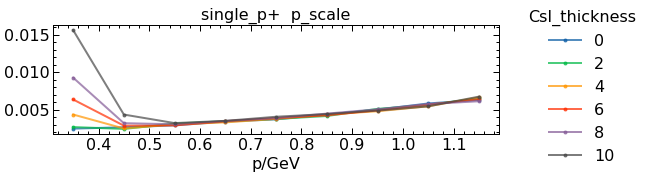

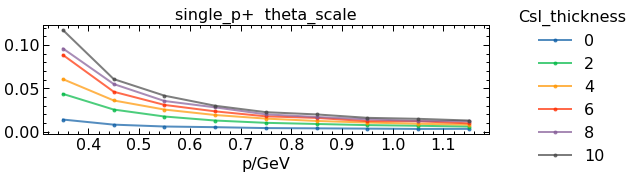

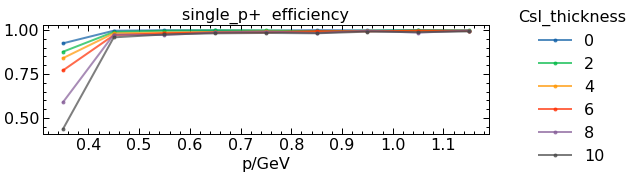

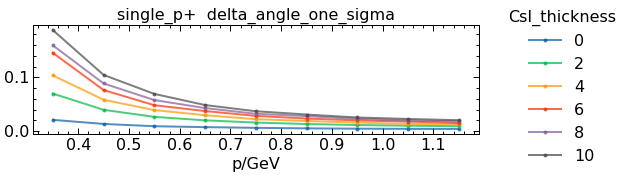

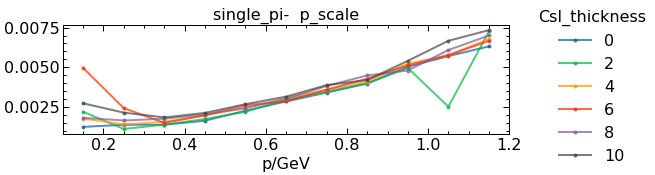

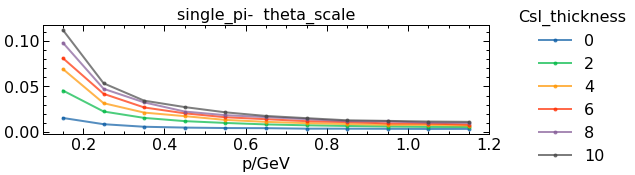

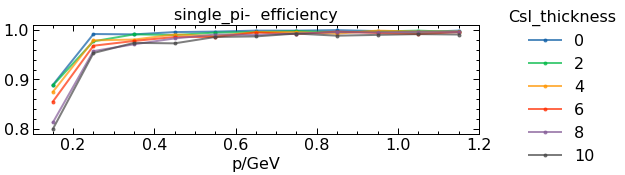

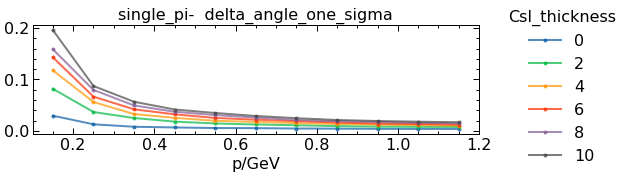

In [67]:
# 动量依赖
ppi_csi_data_fixed_theta = ppi_csi_data[ppi_csi_data.cos_theta==0.45]

for particle in ['single_p+', 'single_pi-']:
    ppi_csi_data_fixed_theta_particle = ppi_csi_data_fixed_theta[
        (ppi_csi_data_fixed_theta.particle==particle) & 
        (ppi_csi_data_fixed_theta.particle==particle)
    ]
    for key in ['p_scale', 'theta_scale', 'efficiency', 'delta_angle_one_sigma']:
        # print(particle, key)
        tmp = pd.DataFrame(index=np.sort(ppi_csi_data_fixed_theta_particle.p.unique()))
        tmp.index.name = 'p/GeV'
        tmp.columns.name = 'CsI_thickness'
        for thickness in np.sort(ppi_csi_data_fixed_theta_particle.thickness.unique()):
            tmp[thickness] = ppi_csi_data_fixed_theta_particle[
                (ppi_csi_data_fixed_theta_particle.thickness==thickness)
            ].set_index('p').reindex(tmp.index)[key]

        tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format(particle, key), figsize=(8,2))
        plt.legend(loc=2, bbox_to_anchor=(1.05,1.2),borderaxespad = 0., title='CsI_thickness')
        plt.show()
            

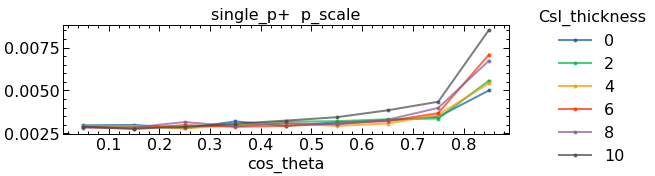

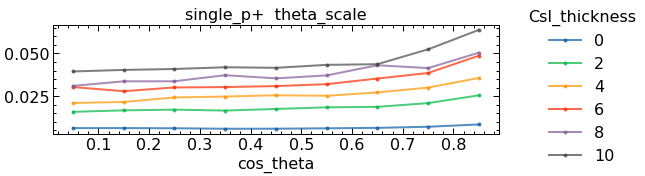

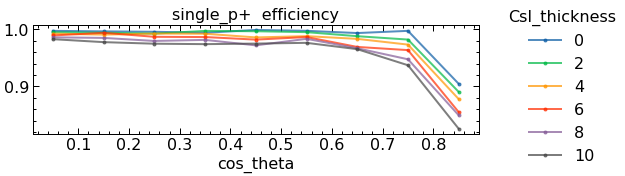

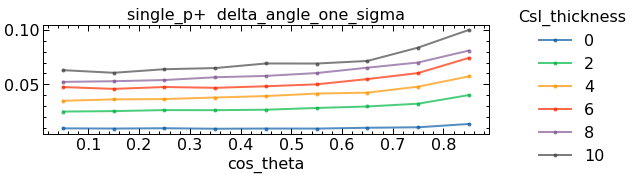

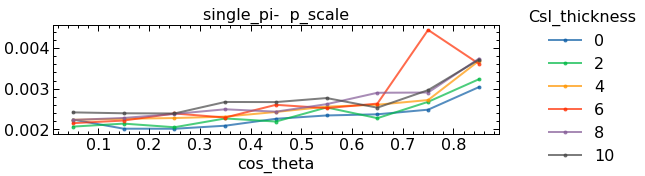

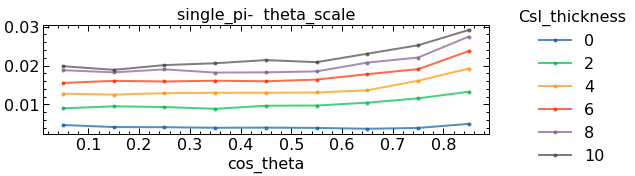

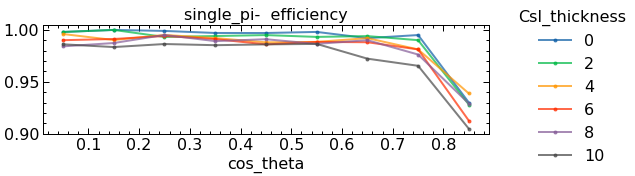

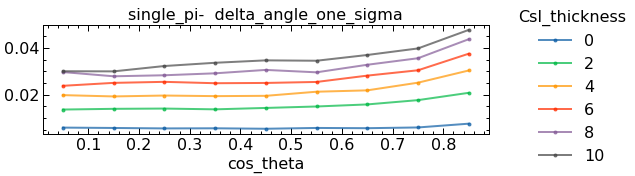

In [70]:
# theta依赖
ppi_csi_data_fixed_p = ppi_csi_data[ppi_csi_data.p==0.55]

for particle in ['single_p+', 'single_pi-']:
    ppi_csi_data_fixed_p_particle = ppi_csi_data_fixed_p[
        (ppi_csi_data_fixed_p.particle==particle) & 
        (ppi_csi_data_fixed_p.particle==particle)
    ]
    for key in ['p_scale', 'theta_scale', 'efficiency', 'delta_angle_one_sigma']:
        # print(particle, key)
        tmp = pd.DataFrame(index=np.sort(ppi_csi_data_fixed_p_particle.cos_theta.unique()))
        tmp.index.name = 'cos_theta'
        tmp.columns.name = 'CsI_thickness'
        for thickness in np.sort(ppi_csi_data_fixed_p_particle.thickness.unique()):
            tmp[thickness] = ppi_csi_data_fixed_p_particle[
                (ppi_csi_data_fixed_p_particle.thickness==thickness)
            ].set_index('cos_theta').reindex(tmp.index)[key]

        tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format(particle, key), figsize=(8,2))
        plt.legend(loc=2, bbox_to_anchor=(1.05,1.2),borderaxespad = 0., title='CsI_thickness')
        plt.show()

## 2. n0

In [62]:
n0_file = os.path.join(result_path, 'single_n0.csv')
n0_data = pd.read_csv(n0_file, index_col=0)

n0_data

,particle,material,thickness,p,cos_theta,efficiency,hit_additional_layer,all
0,single_n0,ld,0,0.05,0.05,0.001035,1.0,966.0
1,single_n0,ld,0,0.05,0.15,0.000000,0.0,925.0
2,single_n0,ld,0,0.05,0.25,0.001104,1.0,906.0
3,single_n0,ld,0,0.05,0.35,0.002151,2.0,930.0
4,single_n0,ld,0,0.05,0.45,0.002062,2.0,970.0
...,...,...,...,...,...,...,...,...
1291,single_n0,lh,10,1.15,0.45,0.001088,1.0,919.0
1292,single_n0,lh,10,1.15,0.55,0.007718,7.0,907.0
1293,single_n0,lh,10,1.15,0.65,0.009073,9.0,992.0
1294,single_n0,lh,10,1.15,0.75,0.003222,3.0,931.0


In [75]:
n0_csi_data = n0_data[n0_data.material=='csi']

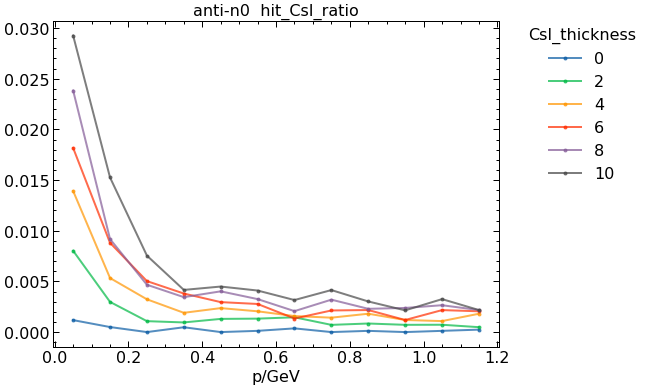

In [99]:
# 动量依赖

tmp = pd.DataFrame(index=np.sort(n0_csi_data.p.unique()))
tmp.index.name = 'p/GeV'
tmp.columns.name = 'CsI_thickness'
for thickness in np.sort(n0_csi_data.thickness.unique()):
    df = n0_csi_data[
        (n0_csi_data.thickness==thickness)
    ].groupby('p').sum()
    tmp[thickness] = df.hit_additional_layer / df['all']

tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format('anti-n0', 'hit_CsI_ratio'), figsize=(8,6))
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness')
plt.show()

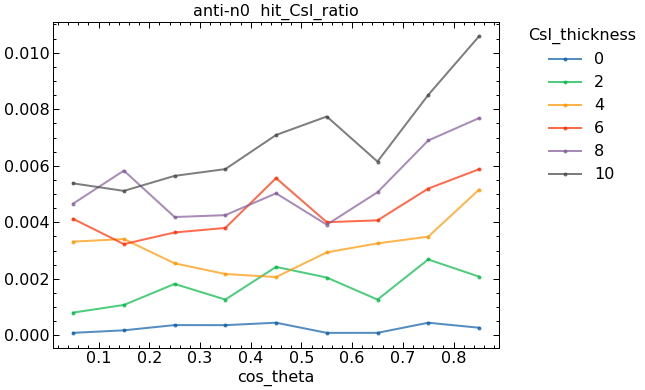

In [97]:
# theta依赖

tmp = pd.DataFrame(index=np.sort(n0_csi_data.cos_theta.unique()))
tmp.index.name = 'cos_theta'
tmp.columns.name = 'CsI_thickness'
for thickness in np.sort(n0_csi_data.thickness.unique()):
    df = n0_csi_data[
        (n0_csi_data.thickness==thickness)
    ].groupby('cos_theta').sum()
    tmp[thickness] = df.hit_additional_layer / df['all']

tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format('anti-n0', 'hit_CsI_ratio'), figsize=(8,6))
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness')
plt.show()